In [1]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer #  TF-IDF to vectorize words 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time
# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, 
                        module='gensim')
import gensim
import os

!pip install -q textdistance
import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm
tqdm.pandas()
import re
import spacy
import numpy as np
import seaborn as sns
from spacy.language import Language
from spacy import displacy
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')

In [19]:
import sklearn
sklearn.__version__

'1.1.3'

In [3]:
data = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\topic.csv')

In [4]:
data = data['clean_tweet_wt_stem']

In [5]:
data.dropna(inplace=True)

In [6]:
data

0         increase legroom airlines compare via cnnmoney
1      third straight time flight delayed flying guys...
2       sure happened usairways status merger took place
3      probably least satisfactory airline ever never...
4      wait 2 hrs cs call back flt cxld protection am...
                             ...                        
571    son passenger flight 3710 chicago toronto plan...
572                                  inadequate accident
573    brothers baggage lost route 2015 panamerican c...
574      different airport way getting different airport
575    cancelled flightled none passengers notified c...
Name: clean_tweet_wt_stem, Length: 576, dtype: object

  0%|          | 0/576 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

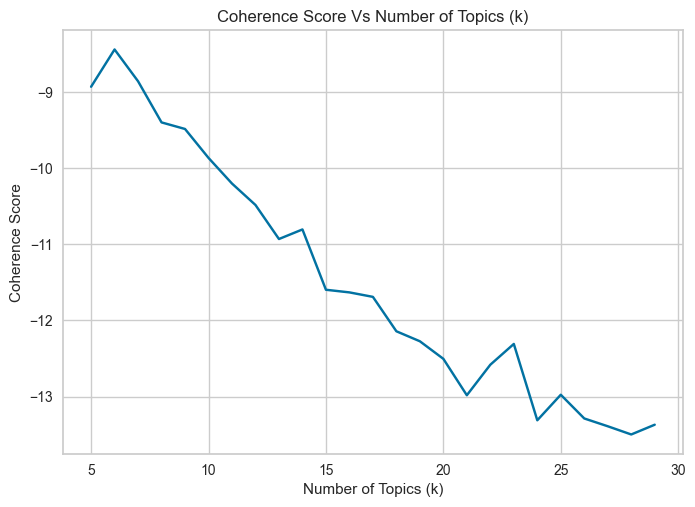

No of Topic Selected by Coherence Score: 6


In [7]:
docs = [] # Initializing list
for tweet in tqdm(data): # loop through tweets 
    docs.append(tweet)  # add to the list

# Merge the words into a single string 
vocab_size = len(set(" ".join(docs).split(" ")))

# Converting into tokens
tokens = [text.split() for text in docs]

# Storing using class to map words to integers ids
id2word = Dictionary(tokens)

# Storing into corpus using method to generate 
# no. of times word appears
corpus = [id2word.doc2bow(text) for text in tokens]

#Setting up LDA model

coh = []
for i in tqdm(range(5,30)):
    model = LdaModel(corpus, i, id2word,random_state=42)
    cm = CoherenceModel(model=model, corpus=corpus, 
                        coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    coh.append(coherence)

# Setting up ploting details 
plt.plot(range(5,30),coh)
plt.title('Coherence Score Vs Number of Topics (k)')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Coherence Score')
plt.show()

# calculating for different numbers of topics
# 'np.array(coh).argmax()' finds the index of the maximum coherence score
# '+ 5' is added to the index, assuming the number of topics started from 5


k_topic = np.array(coh).argmax() + 5

print('No of Topic Selected by Coherence Score:',k_topic)

In [8]:
tfidf_featurizer = TfidfVectorizer(max_features=vocab_size, 
                                       max_df=0.95, stop_words='english')

docs_tfidf = tfidf_featurizer.fit_transform(docs) # Transform to TF-IDF

In [9]:
# !pip install pyLDAvis==2.1.2

In [ ]:
'1.1.3'

In [ ]:
!pip install sklearn==1.1.3

In [10]:
import pyLDAvis.sklearn

In [11]:
pyLDAvis.__version__

'2.1.2'

In [12]:
gensim.__version__

'4.3.0'

In [20]:
import sklearn
sklearn.__version__

'1.1.3'

In [13]:
pyLDAvis.enable_notebook() # To enable the visualization on the notebook

In [14]:
LDA_model = LatentDirichletAllocation(n_components=k_topic, 
                                          random_state=42)
LDA_model.fit(docs_tfidf)

LatentDirichletAllocation(n_components=6, random_state=42)

In [15]:
panel = pyLDAvis.sklearn.prepare(LDA_model, docs_tfidf, tfidf_featurizer) # Create the panel for the visualization
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.053464 -0.031210       1        1  18.096917
0      0.047904 -0.044064       2        1  17.596903
1      0.005686  0.032542       3        1  16.947530
4     -0.009406  0.020249       4        1  16.040339
2      0.016706  0.025470       5        1  15.953288
5     -0.007425 -0.002987       6        1  15.365023, topic_info=          Term      Freq     Total Category  logprob  loglift
915       hung  3.000000  3.000000  Default  30.0000  30.0000
753   flighted  2.000000  2.000000  Default  29.0000  29.0000
289        bad  2.000000  2.000000  Default  28.0000  28.0000
367     called  1.000000  1.000000  Default  27.0000  27.0000
1181     money  2.000000  2.000000  Default  26.0000  26.0000
...        ...       ...       ...      ...      ...      ...
528   customer  0.562582  4.265676   Topic6  -6.0826  -0.1527
1869   waiting  0.556523  4.219396   Topic6  -6.0934  -0.1527
1547   service  0.537780  5.180367   Topic6  -6.1277  -0.3921
1882   weather  0.513627  2.886806   Topic6  -6.1736   0.1467
887       hold  0.514785  4.638465   Topic6  -6.1714  -0.3253

[388 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
156       1  0.843179       able
163       1  0.991101    abysmal
189       3  0.409810      agent
189       6  0.409810      agent
190       5  0.603876     agents
...     ...       ...        ...
1889      6  0.796862      weeks
1912      1  0.531962       work
1918      2  0.528562      worst
1918      3  0.528562      worst
1938      3  0.660260  yesterday

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3, 6])

In [16]:
pyLDAvis.save_html(panel, 'lda.html')